In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles

In [2]:
name, samples = get_samples('gauss_8')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
logXf_true = samples.logX().iloc[true_endpoint]

In [31]:
figsettings()

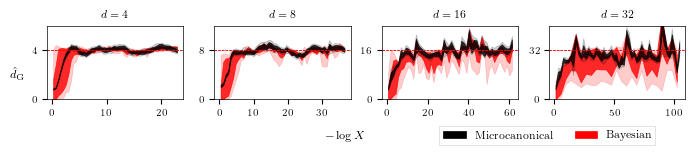

In [47]:
fig, axs = plt.subplots(1, 4, figsize=(7, 1.5))
chains = ['gauss_4', 'gauss_8', 'gauss_16', 'gauss_32']
titles = ['4', '8', '16', '32']

for ax, chain, title in zip(axs, chains, titles):
    name, samples = get_samples(chain)
    model = EndModel(samples)
    true_endpoint = model.true_endpoint()
    logXf_true = samples.logX().iloc[true_endpoint]

    iterations, *d_Gs = read_from_txt(f'{data_dir}/d_Gs/post/{chain}.txt')
    logXs = samples.logX().iloc[iterations]
    plot_quantiles(-logXs, d_Gs, int(title), ylim=(0, 1.5), ax=ax, color='red')
    
    iterations, *d_Gs = read_from_txt(f'{data_dir}/d_Gs/grad/{chain}.txt')
    logXs = samples.logX().iloc[iterations]
    plot_quantiles(-logXs, d_Gs, int(title), ylim=(0, 1.5), ax=ax, color='black')
    
    ax.set_title(f'$d = {title}$', fontsize=8)
    ax.set_yticks([0, int(title)], [0, int(title)])

from matplotlib.patches import Patch
custom_patches = [Patch(color='black', label='Microcanonical'), Patch(color='red', label='Bayesian')]
fig.legend(handles=custom_patches, bbox_to_anchor=(0.95, 0.19), ncol=2, fontsize=8)

fig.supxlabel(r'$-\log X$', y=0.05)
fig.supylabel(r'$\hat{d}_\mathrm{G}$', x=0.02, rotation=0)
fig.tight_layout()